In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## 1. PREPARE DATA

### 1.1. Read CustomerDemographic Table

In [2]:
df_dem = pd.read_excel('./data/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=3, skiprows=[0], usecols='A:M', engine='openpyxl')
df_dem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [3]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [4]:
print('The CustomerDemographic Table has', df_dem.shape[0], 'rows and', df_dem.shape[1], 'columns.')

The CustomerDemographic Table has 4000 rows and 13 columns.


### 1.2. Read CustomerAddress Table

In [5]:
df_add = pd.read_excel('./data/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=4, skiprows=[0], usecols='A:F', engine='openpyxl')
df_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [6]:
df_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [7]:
print('The CustomerAddress Table has', df_add.shape[0], 'rows and', df_add.shape[1], 'columns.')

The CustomerAddress Table has 3999 rows and 6 columns.


### 1.3. Read Transactions Table

In [8]:
df_trans = pd.read_excel('./data/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=1, skiprows=[0], usecols='A:M', engine='openpyxl')
df_trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [9]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [10]:
print('The Transactions Table has', df_trans.shape[0], 'rows and', df_trans.shape[1], 'columns.')

The Transactions Table has 20000 rows and 13 columns.


### 1.4. Read NewCustomerList Table

In [11]:
df_newlist = pd.read_excel('./data/KPMG_VI_New_raw_data_update_final.xlsx', sheet_name=2, skiprows=[0], usecols='A:W', engine='openpyxl')
df_newlist.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.49,0.6125,0.765625,0.650781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.53,0.5300,0.662500,0.563125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.49,0.4900,0.490000,0.490000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.69,0.8625,0.862500,0.862500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.46,0.4600,0.575000,0.575000,4,4,1.703125


In [12]:
df_newlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [13]:
print('The NewCustomerList Table has', df_newlist.shape[0], 'rows and', df_newlist.shape[1], 'columns.')

The NewCustomerList Table has 1000 rows and 23 columns.


## 2. PROCESS DATA

### 2.1. Check data in 3 tables

**CustomerDemographic**

In [14]:
# Check the data for duplicates
print('Shape before dropping duplicates', df_dem.shape)
df_dem = df_dem.drop_duplicates()
print('Shape after dropping duplicates', df_dem.shape)

Shape before dropping duplicates (4000, 13)
Shape after dropping duplicates (4000, 13)


CustomerDemographic Table has no duplicates

In [15]:
# Check the data for missing values
print(np.sum(df_dem.isnull()), '\n')

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64 



 There are lots of missing data records in CustomerDemographic Table

**CustomerAddress**

In [16]:
# Check the data for duplicates
print('Shape before dropping duplicates', df_add.shape)
df_add = df_add.drop_duplicates()
print('Shape after dropping duplicates', df_add.shape)

Shape before dropping duplicates (3999, 6)
Shape after dropping duplicates (3999, 6)


CustomerAddress Table has no duplicates

In [17]:
# Check the data for missing values
print(np.sum(df_add.isnull()), '\n')

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64 



 There are no missing data records in CustomerAddress Table

**Transactions**

In [18]:
# Check the data for duplicates
print('Shape before dropping duplicates', df_trans.shape)
df_trans = df_trans.drop_duplicates()
print('Shape after dropping duplicates', df_trans.shape)

Shape before dropping duplicates (20000, 13)
Shape after dropping duplicates (20000, 13)


Transactions Table has no duplicates

In [19]:
# Check the data for missing values
print(np.sum(df_trans.isnull()), '\n')

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64 



 There are lots of missing data records in Transactions Table

### 2.2. Merge 3 tables into 1 table

In [20]:
df_1 = pd.merge(df_dem, df_add, how='outer', on=['customer_id'])

In [21]:
df_dem.shape

(4000, 13)

In [22]:
df_add.shape

(3999, 6)

In [23]:
df_1.shape

(4003, 18)

In [24]:
df_all = pd.merge(df_trans, df_1, how='outer', on=['customer_id'])

In [25]:
df_trans.shape

(20000, 13)

In [26]:
df_all.shape

(20510, 30)

In [27]:
df_1.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'address', 'postcode', 'state',
       'country', 'property_valuation'],
      dtype='object')

In [28]:
df_trans.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [29]:
df_all.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1.0,2.0,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
1,11065.0,1.0,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
2,18923.0,62.0,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064.0,VIC,Australia,6.0


In [30]:
# Check the data for missing values
print(np.sum(df_all.isnull()), '\n')

transaction_id                          510
product_id                              510
customer_id                               0
transaction_date                        510
online_order                            870
order_status                            510
brand                                   707
product_line                            707
product_class                           707
product_size                            707
list_price                              510
standard_cost                           707
product_first_sold_date                 707
first_name                                6
last_name                               661
gender                                    6
past_3_years_bike_related_purchases       6
DOB                                     463
job_title                              2483
job_industry_category                  3330
wealth_segment                            6
deceased_indicator                        6
default                         

There are **510 customers without having any transactions** => Need to be removed 510 records where 'transaction_id' is empty

### 2.3. The table for analyzing

In [31]:
df_all = df_all.loc[~df_all['transaction_id'].isnull()]

In [32]:
df_all.shape

(20000, 30)

In [33]:
df_all.tail(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
19997,18462.0,80.0,2789,2017-06-20,0.0,Approved,OHM Cycles,Touring,low,medium,...,Affluent Customer,N,ãã¼ãã£ã¼ã¸è¡ããªãã,Yes,7.0,724 West Park,2112.0,NSW,Australia,11.0
19998,17981.0,69.0,3446,2017-12-26,1.0,Approved,Giant Bicycles,Road,medium,medium,...,Mass Customer,N,NaN,No,14.0,8 Becker Drive,4868.0,QLD,Australia,4.0
19999,18165.0,86.0,3446,2017-12-03,0.0,Approved,OHM Cycles,Standard,medium,medium,...,Mass Customer,N,NaN,No,14.0,8 Becker Drive,4868.0,QLD,Australia,4.0


In [34]:
print('The table has', df_all.shape[0], 'rows and', df_all.shape[1], 'columns.')

The table has 20000 rows and 30 columns.


In [35]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  float64       
 1   product_id                           20000 non-null  float64       
 2   customer_id                          20000 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         19640 non-null  float64       
 5   order_status                         20000 non-null  object        
 6   brand                                19803 non-null  object        
 7   product_line                         19803 non-null  object        
 8   product_class                        19803 non-null  object        
 9   product_size                         19803 non-null  object        
 10  list_price

In [36]:
df_all.describe().applymap(lambda x: f'{x:0.2f}')

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date,past_3_years_bike_related_purchases,tenure,postcode,property_valuation
count,20000.00,20000.00,20000.00,19640.00,20000.00,19803.00,19803.00,19997.00,19551.00,19968.00,19968.00
mean,10000.50,45.36,1738.25,0.50,1107.83,556.05,38199.78,48.77,10.68,2987.62,7.52
std,5773.65,30.75,1011.95,0.50,582.83,405.96,2875.20,28.60,5.68,851.31,2.82
min,1.00,0.00,1.00,0.00,12.01,7.21,33259.00,0.00,1.00,2000.00,1.00
25%,5000.75,18.00,857.75,0.00,575.27,215.14,35667.00,24.00,6.00,2200.00,6.00
50%,10000.50,44.00,1736.00,1.00,1163.89,507.58,38216.00,48.00,11.00,2767.00,8.00
75%,15000.25,72.00,2613.00,1.00,1635.30,795.10,40672.00,73.00,15.00,3754.00,10.00
max,20000.00,100.00,5034.00,1.00,2091.47,1759.85,42710.00,99.00,22.00,4883.00,12.00


### 2.4. Convert

In [91]:
# Convert 'transaction_id', 'product_id', 'customer_id' into string
df_all['transaction_id'] = df_all['transaction_id'].astype(str)
df_all['product_id'] = df_all['product_id'].astype(str)
df_all['customer_id'] = df_all['customer_id'].astype(str)
df_all['postcode'] = df_all['postcode'].astype(str)

In [39]:
# Numerical columns
number_vars = [f for f in df_all.columns if df_all.dtypes[f] != 'object']
list_nums = ', '.join(number_vars)
list_nums

'transaction_date, online_order, list_price, standard_cost, product_first_sold_date, past_3_years_bike_related_purchases, DOB, tenure, postcode, property_valuation'

In [40]:
# Categorical columns
object_vars = [f for f in df_all.columns if df_all.dtypes[f] == 'object']
list_objs = ', '.join(object_vars)
list_objs

'transaction_id, product_id, customer_id, order_status, brand, product_line, product_class, product_size, first_name, last_name, gender, job_title, job_industry_category, wealth_segment, deceased_indicator, default, owns_car, address, state, country'

In [41]:
# Components in categorical columns
i = 1
for ob in object_vars:
 print(i, '/', ob, '\t',len(df_all[ob].unique()),':', df_all[ob].unique())
 i = i+1

1 / transaction_id 	 20000 : ['1.0' '11065.0' '18923.0' ... '18462.0' '17981.0' '18165.0']
2 / product_id 	 101 : ['2.0' '1.0' '62.0' '3.0' '4.0' '91.0' '95.0' '38.0' '41.0' '10.0' '37.0'
 '47.0' '12.0' '61.0' '77.0' '88.0' '59.0' '98.0' '73.0' '71.0' '78.0'
 '54.0' '83.0' '40.0' '45.0' '22.0' '31.0' '39.0' '23.0' '25.0' '60.0'
 '53.0' '90.0' '16.0' '68.0' '29.0' '69.0' '28.0' '55.0' '15.0' '50.0'
 '0.0' '30.0' '99.0' '14.0' '5.0' '96.0' '67.0' '81.0' '21.0' '84.0' '8.0'
 '19.0' '79.0' '18.0' '6.0' '89.0' '56.0' '86.0' '42.0' '80.0' '51.0'
 '35.0' '11.0' '44.0' '32.0' '66.0' '57.0' '33.0' '26.0' '58.0' '48.0'
 '65.0' '74.0' '43.0' '27.0' '17.0' '64.0' '82.0' '34.0' '72.0' '7.0'
 '49.0' '36.0' '70.0' '76.0' '97.0' '92.0' '63.0' '46.0' '9.0' '93.0'
 '94.0' '20.0' '87.0' '13.0' '85.0' '100.0' '75.0' '52.0' '24.0']
3 / customer_id 	 3494 : ['2950' '3120' '402' ... '130' '2789' '3446']
4 / order_status 	 2 : ['Approved' 'Cancelled']
5 / brand 	 7 : ['Solex' 'Giant Bicycles' 'Trek Bicycles' 

**Categorical variables** include: 'order_status', 'brand', 'product_line', 'product_class', 'product_size', 'gender', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'state', 'country'

## 3. ANALYZE

_Analyzing variables based on NewCustomerList table_

### 3.1. 'order_status'

In [62]:
df_all_status = df_all.groupby(['order_status']).order_status.count()
df_all_status

order_status
Approved     19821
Cancelled      179
Name: order_status, dtype: int64

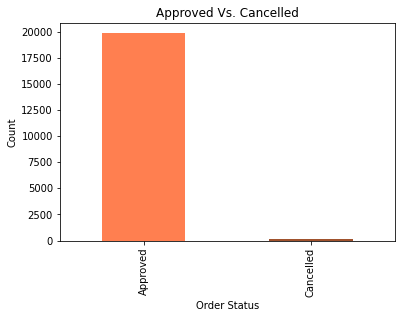

In [63]:
plt.figure(figsize=(6,4))
df_all_status.plot.bar(color=['coral', 'sienna'], title='Approved Vs. Cancelled')
plt.xlabel('Order Status')
plt.ylabel('Count');

- Number of approved status is much greater than cancelled status

### 3.2. 'brand'

In [64]:
df_all_brand = df_all.groupby(['brand']).brand.count().sort_values()
df_all_brand

brand
Norco Bicycles    2910
Trek Bicycles     2990
OHM Cycles        3043
WeareA2B          3295
Giant Bicycles    3312
Solex             4253
Name: brand, dtype: int64

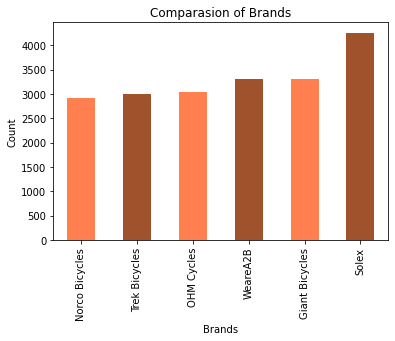

In [65]:
plt.figure(figsize=(6,4))
df_all_brand.plot.bar(color=['coral', 'sienna'], title='Comparasion of Brands')
plt.xlabel('Brands')
plt.ylabel('Count');

- Solex has highest number of customers (4253)
- Norco Bicycles has smallest number of customers (2910)

### 3.3. 'gender'

In [72]:
df_all['gender'].unique()

array(['Male', 'Female', 'U', 'F', 'M', 'Femal', nan], dtype=object)

**Transform 'M' to 'Male'; 'Femal' and 'F' to 'Female'**

In [77]:
df_all['gender'] = df_all['gender'].replace('M', 'Male')
df_all['gender'] = df_all['gender'].replace('F', 'Female')
df_all['gender'] = df_all['gender'].replace('Femal', 'Female')

In [78]:
df_all_gen = df_all.groupby(['gender']).gender.count().sort_values()
df_all_gen

gender
U           455
Male       9531
Female    10011
Name: gender, dtype: int64

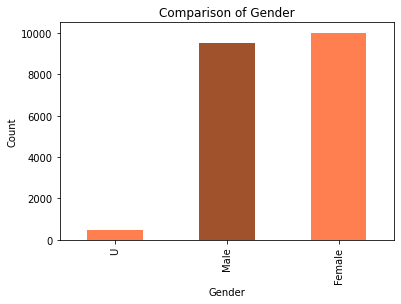

In [79]:
plt.figure(figsize=(6,4))
df_all_gen.plot.bar(color=['coral', 'sienna'], title='Comparison of Gender')
plt.xlabel('Gender')
plt.ylabel('Count');

- Gender records where ‘U’ have been replaced based on the distribution from the training dataset
- Male and Female have similar number of customers

### 3.4. 'job_industry_category'

In [80]:
df_all_jobcate = df_all.groupby(['job_industry_category']).job_industry_category.count().sort_values()
df_all_jobcate

job_industry_category
Telecommunications     354
Argiculture            578
Entertainment          698
IT                    1084
Property              1297
Retail                1758
Health                3099
Financial Services    3886
Manufacturing         4014
Name: job_industry_category, dtype: int64

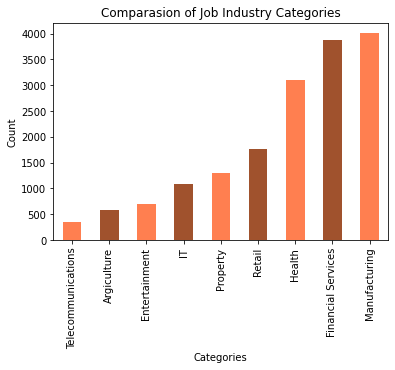

In [81]:
plt.figure(figsize=(6,4))
df_all_jobcate.plot.bar(color=['coral', 'sienna'], title='Comparasion of Job Industry Categories')
plt.xlabel('Categories')
plt.ylabel('Count');

- There are lots of customers are working at Financial Services and Manufacturing.

### 3.5. 'wealth_segment'

In [82]:
df_all_wealthseg = df_all.groupby(['wealth_segment']).wealth_segment.count().sort_values()
df_all_wealthseg

wealth_segment
Affluent Customer     4858
High Net Worth        5088
Mass Customer        10051
Name: wealth_segment, dtype: int64

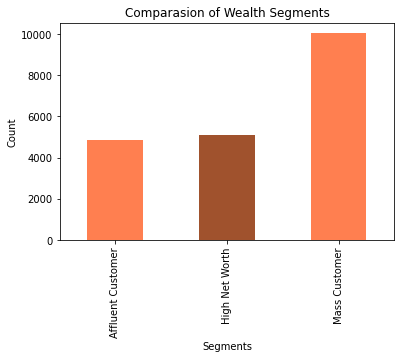

In [83]:
plt.figure(figsize=(6,4))
df_all_wealthseg.plot.bar(color=['coral', 'sienna'], title='Comparasion of Wealth Segments')
plt.xlabel('Segments')
plt.ylabel('Count');

- Mass Customer is the highest

### 3.6. 'deceased_indicator'

In [84]:
df_all_decind = df_all.groupby(['deceased_indicator']).deceased_indicator.count().sort_values()
df_all_decind

deceased_indicator
Y        8
N    19989
Name: deceased_indicator, dtype: int64

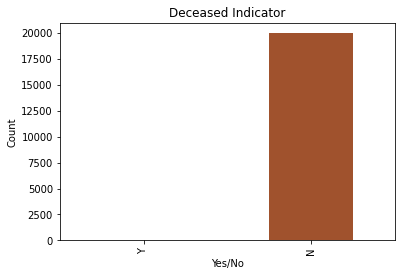

In [85]:
plt.figure(figsize=(6,4))
df_all_decind.plot.bar(color=['coral', 'sienna'], title='Deceased Indicator')
plt.xlabel('Yes/No')
plt.ylabel('Count');

### 3.7. 'owns_car'

In [86]:
df_all_own = df_all.groupby(['owns_car']).owns_car.count().sort_values()
df_all_own

owns_car
No      9934
Yes    10063
Name: owns_car, dtype: int64

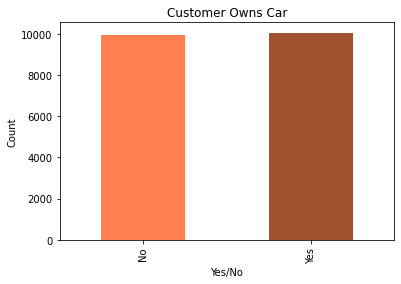

In [87]:
plt.figure(figsize=(6,4))
df_all_own.plot.bar(color=['coral', 'sienna'], title='Customer Owns Car')
plt.xlabel('Yes/No')
plt.ylabel('Count');

### 3.8. 'state'

In [88]:
df_all_state = df_all.groupby(['state']).state.count().sort_values()
df_all_state

state
Victoria             480
New South Wales      485
QLD                 4262
VIC                 4541
NSW                10200
Name: state, dtype: int64

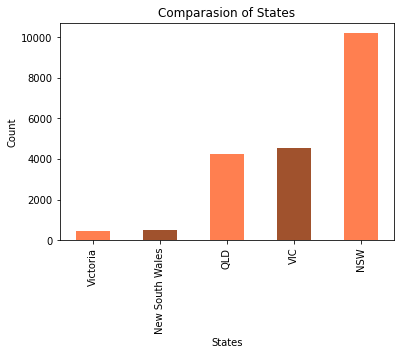

In [89]:
plt.figure(figsize=(6,4))
df_all_state.plot.bar(color=['coral', 'sienna'], title='Comparasion of States')
plt.xlabel('States')
plt.ylabel('Count');

'transaction_date, online_order, list_price, standard_cost, product_first_sold_date, past_3_years_bike_related_purchases, DOB, tenure, postcode, property_valuation'

### 3.10. 'postcode'

In [92]:
df_all_pcode = df_all.groupby(['postcode']).postcode.count().sort_values()
df_all_pcode

postcode
2850.0      1
3194.0      1
3818.0      1
3616.0      1
4159.0      1
         ... 
3977.0    128
2155.0    136
2170.0    140
2770.0    146
2153.0    169
Name: postcode, Length: 836, dtype: int64

In [ ]:
plt.figure(figsize=(6,4))
df_all_brand.plot.bar(color=['coral', 'sienna'], title='Comparasion of Brands')
plt.xlabel('Brands')
plt.ylabel('Count');

### 3.11. 'DOB'

### 3.12. 'tenure'

### 3.13. 'past_3_years_bike_related_purchases'

### 3.14. 'property_valuation'